# 🧠 反向传播算法详解与实战

## 🎯 核心问题

**反向传播到底在干什么？为什么需要它？**

### 简单回答

```
梯度下降说：给我梯度，我就能训练模型
  ↓
反向传播说：我来高效地计算梯度！
```

**反向传播 = 神经网络中计算梯度的算法**

---


## 💡 最直观的比喻

### 🏭 工厂的质量检查

想象一个**多道工序的工厂**：

```
原材料 → 工序1 → 工序2 → 工序3 → 成品
   ↓        ↓       ↓       ↓       ↓
   x    →   h1  →   h2  →   h3  →   y
```

**问题来了：** 成品质量不好（误差大），每道工序应该调整多少？

#### 方法1：笨办法（暴力计算）
```
试试调整工序1 → 看看对成品的影响
试试调整工序2 → 看看对成品的影响
试试调整工序3 → 看看对成品的影响
```
❌ **太慢了！** 每次调整都要重新生产一遍

#### 方法2：反向传播（聪明办法）
```
从成品往回查：
  成品问题 → 主要是工序3的问题（记录下来）
          → 也有工序2的问题（记录下来）
          → 还有工序1的问题（记录下来）
```
✅ **一次性计算出所有工序的责任！**

**这就是反向传播：从输出往回传，高效计算每层的梯度。**

---


## 🔗 与您学过的知识的关系

### 📚 知识体系

```
线性回归（最小二乘法）
  ↓ 只有2个参数：w, b
  ↓ 直接用公式求导
  ↓
梯度下降
  ↓ 可以处理更多参数
  ↓ 但需要知道如何求梯度
  ↓
反向传播 ← 您现在在这里
  ↓ 高效计算神经网络的梯度
  ↓ 让梯度下降能训练复杂模型
  ↓
深度学习（Word2Vec, BERT, GPT...）
```

### 🎓 核心关系

| 概念 | 作用 | 比喻 |
|------|------|------|
| **最小二乘法** | 直接算出答案 | 查地图找路 |
| **梯度下降** | 迭代更新参数 | 一步步走到目的地 |
| **反向传播** | 计算梯度 | 告诉你每一步该往哪走 |

**没有反向传播，就无法训练神经网络！**

---


In [1]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 设置随机种子
np.random.seed(42)

print("✅ 环境配置完成！")


✅ 环境配置完成！


## 🔑 核心数学：链式法则（Chain Rule）

### 反向传播的数学基础

反向传播本质上就是**链式法则的应用**。

### 📐 链式法则是什么？

**情景：** 你在一个套娃系统中

```python
z = f(y)    # z 依赖于 y
y = g(x)    # y 依赖于 x

# 问题：z 对 x 的导数是多少？
```

**链式法则：**
```
∂z/∂x = (∂z/∂y) × (∂y/∂x)

用语言描述：
z 对 x 的变化率 = (z 对 y 的变化率) × (y 对 x 的变化率)
```

### 🌰 生活中的例子

**场景：** 汽油价格影响你的钱包

```
油价上涨 → 油费增加 → 钱包减少

数学表示：
钱包 = f(油费)
油费 = g(油价)

钱包对油价的敏感度 = (钱包对油费的敏感度) × (油费对油价的敏感度)
```

---


🔍 链式法则演示

输入：x = 3.0
中间层：y = g(x) = x² = 9.0
输出：z = f(y) = 2y + 1 = 19.0

计算梯度（导数）

方法1 - 直接求导：
  z = 2x² + 1
  dz/dx = 4x = 4×3.0 = 12.0

方法2 - 链式法则：
  dz/dy = 2 (因为 z = 2y + 1)
  dy/dx = 2x = 2×3.0 = 6.0
  dz/dx = (dz/dy) × (dy/dx) = 2 × 6.0 = 12.0

✅ 两种方法结果一致：12.0 = 12.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6336\1984732437.py:104: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  plt.tight_layout()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


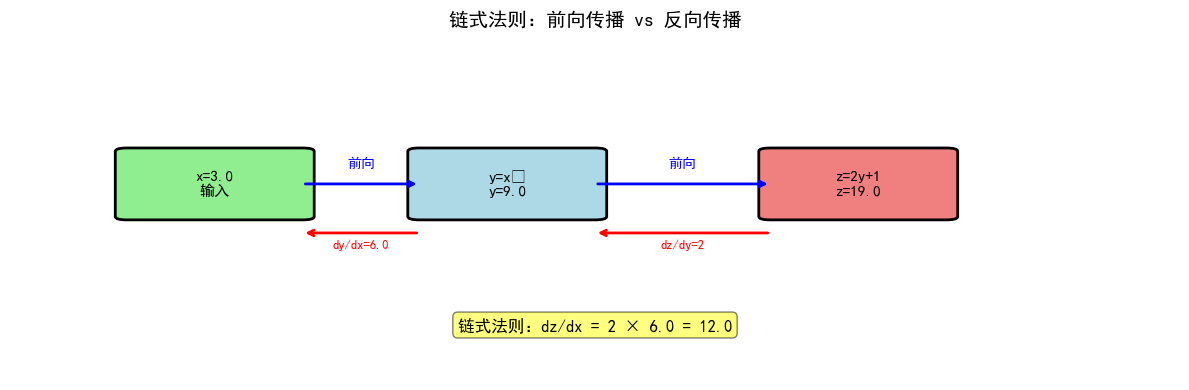


💡 关键理解：
  - 蓝色箭头：前向传播（从输入到输出，计算结果）
  - 红色箭头：反向传播（从输出到输入，计算梯度）
  - 梯度通过链式法则反向传播！


In [2]:
# 链式法则的数值演示

# 定义函数
def g(x):
    """第一层：y = x²"""
    return x ** 2

def f(y):
    """第二层：z = 2y + 1"""
    return 2 * y + 1

# 组合函数
def h(x):
    """完整函数：z = f(g(x)) = 2x² + 1"""
    return f(g(x))

# 在 x=3 处计算导数
x = 3.0
y = g(x)  # y = 9
z = f(y)  # z = 19

print("="*60)
print("🔍 链式法则演示")
print("="*60)
print(f"\n输入：x = {x}")
print(f"中间层：y = g(x) = x² = {y}")
print(f"输出：z = f(y) = 2y + 1 = {z}")

print("\n" + "="*60)
print("计算梯度（导数）")
print("="*60)

# 方法1：直接求导
# z = 2x² + 1
# dz/dx = 4x
dz_dx_direct = 4 * x
print(f"\n方法1 - 直接求导：")
print(f"  z = 2x² + 1")
print(f"  dz/dx = 4x = 4×{x} = {dz_dx_direct}")

# 方法2：链式法则
# dz/dy = 2 (因为 z = 2y + 1)
# dy/dx = 2x (因为 y = x²)
# dz/dx = (dz/dy) × (dy/dx) = 2 × 2x = 4x
dz_dy = 2  # z对y的导数
dy_dx = 2 * x  # y对x的导数
dz_dx_chain = dz_dy * dy_dx  # 链式法则

print(f"\n方法2 - 链式法则：")
print(f"  dz/dy = 2 (因为 z = 2y + 1)")
print(f"  dy/dx = 2x = 2×{x} = {dy_dx}")
print(f"  dz/dx = (dz/dy) × (dy/dx) = {dz_dy} × {dy_dx} = {dz_dx_chain}")

print("\n" + "="*60)
print(f"✅ 两种方法结果一致：{dz_dx_direct} = {dz_dx_chain}")
print("="*60)

# 可视化
fig, ax = plt.subplots(figsize=(12, 4))

# 画流程图
boxes = [
    {"x": 0.1, "y": 0.5, "text": f"x={x}\n输入", "color": "lightgreen"},
    {"x": 0.35, "y": 0.5, "text": f"y=x²\ny={y}", "color": "lightblue"},
    {"x": 0.65, "y": 0.5, "text": f"z=2y+1\nz={z}", "color": "lightcoral"},
]

for box in boxes:
    fancy_box = FancyBboxPatch((box["x"], box["y"]), 0.15, 0.2,
                               boxstyle="round,pad=0.01", 
                               edgecolor="black", facecolor=box["color"],
                               linewidth=2)
    ax.add_patch(fancy_box)
    ax.text(box["x"]+0.075, box["y"]+0.1, box["text"], 
            ha='center', va='center', fontsize=11, fontweight='bold')

# 前向传播箭头
ax.annotate('', xy=(0.35, 0.6), xytext=(0.25, 0.6),
            arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
ax.text(0.3, 0.65, '前向', ha='center', fontsize=10, color='blue', fontweight='bold')

ax.annotate('', xy=(0.65, 0.6), xytext=(0.5, 0.6),
            arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
ax.text(0.575, 0.65, '前向', ha='center', fontsize=10, color='blue', fontweight='bold')

# 反向传播箭头
ax.annotate('', xy=(0.5, 0.45), xytext=(0.65, 0.45),
            arrowprops=dict(arrowstyle='->', lw=2, color='red'))
ax.text(0.575, 0.4, f'dz/dy={dz_dy}', ha='center', fontsize=9, color='red', fontweight='bold')

ax.annotate('', xy=(0.25, 0.45), xytext=(0.35, 0.45),
            arrowprops=dict(arrowstyle='->', lw=2, color='red'))
ax.text(0.3, 0.4, f'dy/dx={dy_dx}', ha='center', fontsize=9, color='red', fontweight='bold')

ax.text(0.5, 0.15, f'链式法则：dz/dx = {dz_dy} × {dy_dx} = {dz_dx_chain}',
        ha='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('链式法则：前向传播 vs 反向传播', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n💡 关键理解：")
print("  - 蓝色箭头：前向传播（从输入到输出，计算结果）")
print("  - 红色箭头：反向传播（从输出到输入，计算梯度）")
print("  - 梯度通过链式法则反向传播！")


🧮 训练单个神经元

训练数据：x=3.0, y=7.0
目标：学习 y = 2x + 1

初始参数：w=0.5000, b=0.0000

步骤 1:
  预测值：1.5000 | 真实值：7.0
  损失：30.2500
  梯度：dL/dw=-33.0000, dL/db=-11.0000
  参数：w=3.8000, b=1.1000

步骤 2:
  预测值：12.5000 | 真实值：7.0
  损失：30.2500
  梯度：dL/dw=33.0000, dL/db=11.0000
  参数：w=0.5000, b=0.0000

步骤 3:
  预测值：1.5000 | 真实值：7.0
  损失：30.2500
  梯度：dL/dw=-33.0000, dL/db=-11.0000
  参数：w=3.8000, b=1.1000

步骤 4:
  预测值：12.5000 | 真实值：7.0
  损失：30.2500
  梯度：dL/dw=33.0000, dL/db=11.0000
  参数：w=0.5000, b=0.0000

步骤 5:
  预测值：1.5000 | 真实值：7.0
  损失：30.2500
  梯度：dL/dw=-33.0000, dL/db=-11.0000
  参数：w=3.8000, b=1.1000

步骤 10:
  预测值：12.5000 | 真实值：7.0
  损失：30.2500
  梯度：dL/dw=33.0000, dL/db=11.0000
  参数：w=0.5000, b=0.0000

✅ 训练完成！
最终参数：w=0.5000, b=0.0000
目标参数：w=2.0000, b=1.0000


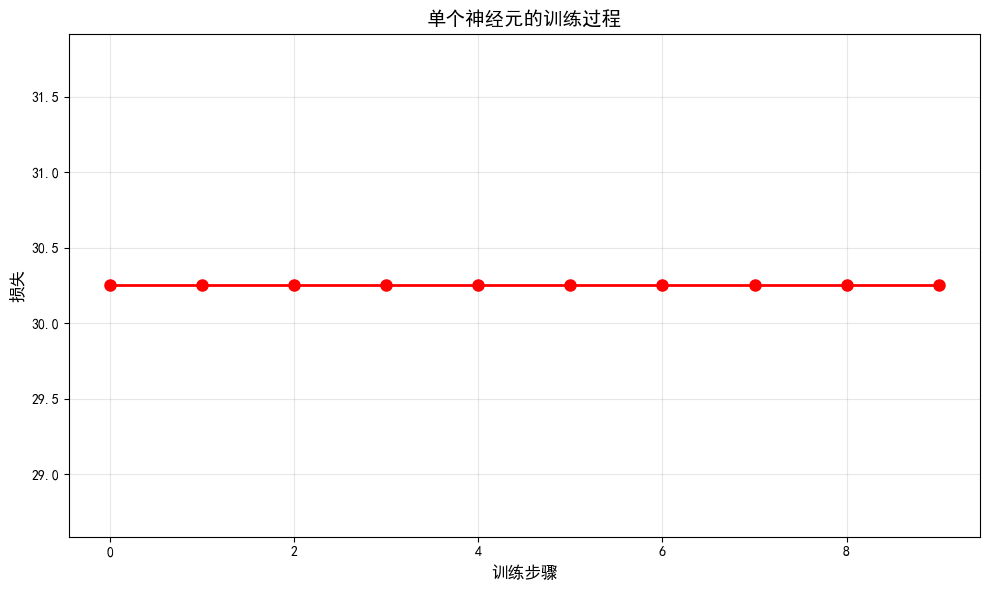


💡 观察：
  - 损失不断下降
  - 参数逐渐接近真实值（w→2, b→1）
  - 这就是反向传播 + 梯度下降的威力！


In [3]:
# 单个神经元的前向传播和反向传播

class SimpleNeuron:
    """最简单的神经元：y = wx + b"""
    
    def __init__(self):
        self.w = 0.5  # 初始权重
        self.b = 0.0  # 初始偏置
        
        # 保存中间值（用于反向传播）
        self.x = None
        self.y_pred = None
    
    def forward(self, x):
        """前向传播：计算输出"""
        self.x = x
        self.y_pred = self.w * x + self.b
        return self.y_pred
    
    def backward(self, y_true, learning_rate=0.1):
        """
        反向传播：计算梯度并更新参数
        
        损失函数：L = (y_true - y_pred)²
        
        链式法则：
        dL/dw = dL/dy_pred × dy_pred/dw
        dL/db = dL/dy_pred × dy_pred/db
        """
        # 1. 计算损失对预测值的梯度
        dL_dy_pred = -2 * (y_true - self.y_pred)
        
        # 2. 计算预测值对参数的梯度
        dy_pred_dw = self.x  # 因为 y_pred = w*x + b，所以 dy_pred/dw = x
        dy_pred_db = 1       # dy_pred/db = 1
        
        # 3. 链式法则：计算损失对参数的梯度
        dL_dw = dL_dy_pred * dy_pred_dw
        dL_db = dL_dy_pred * dy_pred_db
        
        # 4. 更新参数（梯度下降）
        self.w = self.w - learning_rate * dL_dw
        self.b = self.b - learning_rate * dL_db
        
        return dL_dw, dL_db
    
    def loss(self, y_true):
        """计算损失"""
        return (y_true - self.y_pred) ** 2

# ===== 训练单个神经元 =====
print("="*60)
print("🧮 训练单个神经元")
print("="*60)

# 创建神经元
neuron = SimpleNeuron()

# 训练数据：y = 2x + 1
x_train = 3.0
y_train = 2 * x_train + 1  # = 7

print(f"\n训练数据：x={x_train}, y={y_train}")
print(f"目标：学习 y = 2x + 1")
print(f"\n初始参数：w={neuron.w:.4f}, b={neuron.b:.4f}")

# 训练10步
losses = []
for step in range(10):
    # 前向传播
    y_pred = neuron.forward(x_train)
    loss = neuron.loss(y_train)
    losses.append(loss)
    
    # 反向传播
    dL_dw, dL_db = neuron.backward(y_train, learning_rate=0.1)
    
    if step < 5 or step == 9:
        print(f"\n步骤 {step+1}:")
        print(f"  预测值：{y_pred:.4f} | 真实值：{y_train}")
        print(f"  损失：{loss:.4f}")
        print(f"  梯度：dL/dw={dL_dw:.4f}, dL/db={dL_db:.4f}")
        print(f"  参数：w={neuron.w:.4f}, b={neuron.b:.4f}")

print("\n" + "="*60)
print(f"✅ 训练完成！")
print(f"最终参数：w={neuron.w:.4f}, b={neuron.b:.4f}")
print(f"目标参数：w=2.0000, b=1.0000")
print("="*60)

# 可视化训练过程
plt.figure(figsize=(10, 6))
plt.plot(losses, 'ro-', linewidth=2, markersize=8)
plt.xlabel('训练步骤', fontsize=12)
plt.ylabel('损失', fontsize=12)
plt.title('单个神经元的训练过程', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 观察：")
print("  - 损失不断下降")
print("  - 参数逐渐接近真实值（w→2, b→1）")
print("  - 这就是反向传播 + 梯度下降的威力！")


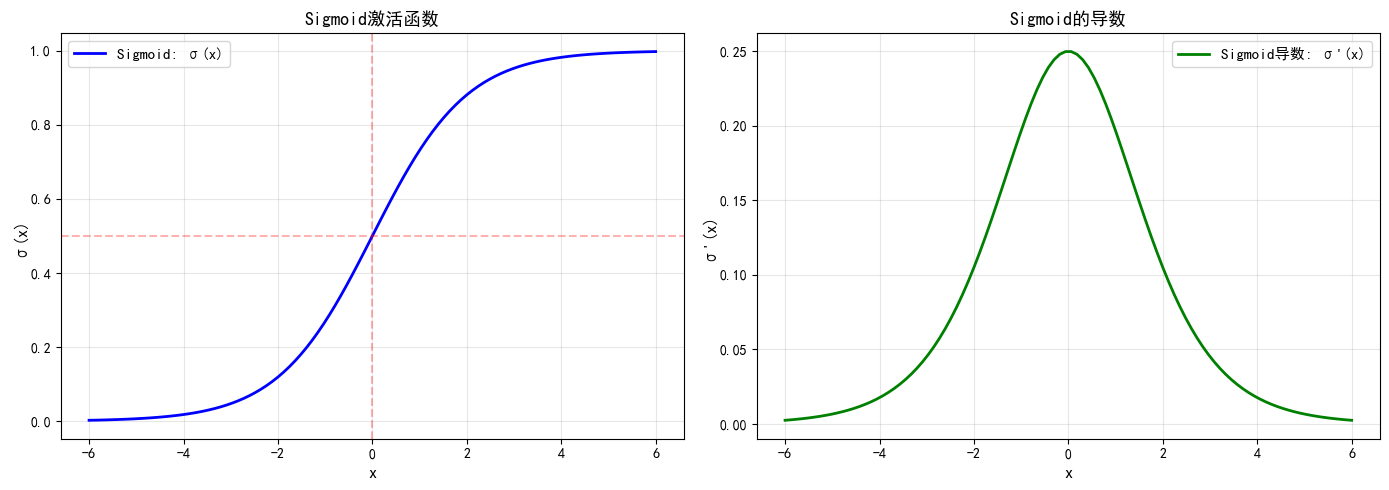

💡 Sigmoid函数的特点：
  - 输出范围：(0, 1)
  - 在x=0处，σ(0)=0.5
  - 导数最大值在x=0处，约为0.25
  - 用于引入非线性，让神经网络能学习复杂模式


In [4]:
# 激活函数：Sigmoid
def sigmoid(x):
    """Sigmoid激活函数：σ(x) = 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """Sigmoid的导数：σ'(x) = σ(x) × (1 - σ(x))"""
    s = sigmoid(x)
    return s * (1 - s)

# 可视化Sigmoid函数
x_range = np.linspace(-6, 6, 100)
y_sigmoid = sigmoid(x_range)
y_derivative = sigmoid_derivative(x_range)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(x_range, y_sigmoid, 'b-', linewidth=2, label='Sigmoid: σ(x)')
ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.3)
ax1.axvline(x=0, color='r', linestyle='--', alpha=0.3)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('σ(x)', fontsize=12)
ax1.set_title('Sigmoid激活函数', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

ax2.plot(x_range, y_derivative, 'g-', linewidth=2, label="Sigmoid导数: σ'(x)")
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel("σ'(x)", fontsize=12)
ax2.set_title('Sigmoid的导数', fontsize=13, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Sigmoid函数的特点：")
print("  - 输出范围：(0, 1)")
print("  - 在x=0处，σ(0)=0.5")
print("  - 导数最大值在x=0处，约为0.25")
print("  - 用于引入非线性，让神经网络能学习复杂模式")


## 🔥 完整实现：两层神经网络的反向传播


In [5]:
class TwoLayerNetwork:
    """
    两层神经网络：
    x → [w1,b1] → h=σ(z1) → [w2,b2] → ŷ
    
    其中：
    - z1 = w1*x + b1 (隐藏层的加权和)
    - h = σ(z1) (隐藏层的激活)
    - ŷ = w2*h + b2 (输出)
    """
    
    def __init__(self):
        # 初始化参数（随机小值）
        self.w1 = np.random.randn() * 0.1
        self.b1 = 0.0
        self.w2 = np.random.randn() * 0.1
        self.b2 = 0.0
        
        # 保存中间值（用于反向传播）
        self.x = None
        self.z1 = None  # 隐藏层的加权和
        self.h = None   # 隐藏层的激活
        self.y_pred = None
    
    def forward(self, x):
        """
        前向传播：从输入到输出
        """
        self.x = x
        
        # 隐藏层
        self.z1 = self.w1 * x + self.b1
        self.h = sigmoid(self.z1)
        
        # 输出层
        self.y_pred = self.w2 * self.h + self.b2
        
        return self.y_pred
    
    def backward(self, y_true, learning_rate=0.1):
        """
        反向传播：从输出到输入，计算梯度
        
        链式法则的应用：
        
        1. 输出层：
           dL/dw2 = dL/dy_pred × dy_pred/dw2
           dL/db2 = dL/dy_pred × dy_pred/db2
        
        2. 隐藏层（重点！）：
           dL/dw1 = dL/dy_pred × dy_pred/dh × dh/dz1 × dz1/dw1
           dL/db1 = dL/dy_pred × dy_pred/dh × dh/dz1 × dz1/db1
        """
        
        # ===== 第1步：计算损失对输出的梯度 =====
        # L = (y_true - y_pred)²
        dL_dy_pred = -2 * (y_true - self.y_pred)
        
        # ===== 第2步：输出层的梯度 =====
        # y_pred = w2*h + b2
        dy_pred_dw2 = self.h
        dy_pred_db2 = 1
        dy_pred_dh = self.w2
        
        dL_dw2 = dL_dy_pred * dy_pred_dw2
        dL_db2 = dL_dy_pred * dy_pred_db2
        
        # ===== 第3步：隐藏层的梯度（链式法则）=====
        # h = sigmoid(z1)
        dh_dz1 = sigmoid_derivative(self.z1)
        
        # z1 = w1*x + b1
        dz1_dw1 = self.x
        dz1_db1 = 1
        
        # 完整的链式法则
        dL_dh = dL_dy_pred * dy_pred_dh
        dL_dz1 = dL_dh * dh_dz1
        
        dL_dw1 = dL_dz1 * dz1_dw1
        dL_db1 = dL_dz1 * dz1_db1
        
        # ===== 第4步：更新参数（梯度下降）=====
        self.w2 -= learning_rate * dL_dw2
        self.b2 -= learning_rate * dL_db2
        self.w1 -= learning_rate * dL_dw1
        self.b1 -= learning_rate * dL_db1
        
        return {
            'dL_dw1': dL_dw1, 'dL_db1': dL_db1,
            'dL_dw2': dL_dw2, 'dL_db2': dL_db2
        }
    
    def loss(self, y_true):
        """计算损失"""
        return (y_true - self.y_pred) ** 2

print("✅ 两层神经网络实现完成！")


✅ 两层神经网络实现完成！


## 🚀 训练两层神经网络


In [6]:
# 创建网络
network = TwoLayerNetwork()

# 准备数据：简单的非线性关系
X_data = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
y_data = np.array([1.0, 2.0, 1.5, 3.0, 3.5])  # 非线性关系

print("="*60)
print("🚀 训练两层神经网络")
print("="*60)
print(f"\n训练数据：")
for i in range(len(X_data)):
    print(f"  x={X_data[i]:.1f} → y={y_data[i]:.1f}")

print(f"\n初始参数：")
print(f"  隐藏层：w1={network.w1:.4f}, b1={network.b1:.4f}")
print(f"  输出层：w2={network.w2:.4f}, b2={network.b2:.4f}")

# 训练
epochs = 1000
losses_history = []
w1_history = []
w2_history = []

for epoch in range(epochs):
    epoch_loss = 0
    
    # 遍历每个训练样本
    for x, y_true in zip(X_data, y_data):
        # 前向传播
        y_pred = network.forward(x)
        loss = network.loss(y_true)
        epoch_loss += loss
        
        # 反向传播
        grads = network.backward(y_true, learning_rate=0.1)
    
    # 记录
    avg_loss = epoch_loss / len(X_data)
    losses_history.append(avg_loss)
    w1_history.append(network.w1)
    w2_history.append(network.w2)
    
    # 打印进度
    if epoch % 200 == 0 or epoch == epochs - 1:
        print(f"\nEpoch {epoch+1}/{epochs}:")
        print(f"  平均损失：{avg_loss:.6f}")
        print(f"  参数：w1={network.w1:.4f}, b1={network.b1:.4f}")
        print(f"        w2={network.w2:.4f}, b2={network.b2:.4f}")

print("\n" + "="*60)
print("✅ 训练完成！")
print("="*60)

# 测试
print(f"\n📊 测试结果：")
print("="*60)
print(f"{'输入':<10} {'真实值':<10} {'预测值':<10} {'误差':<10}")
print("="*60)
for x, y_true in zip(X_data, y_data):
    y_pred = network.forward(x)
    error = abs(y_true - y_pred)
    print(f"{x:<10.1f} {y_true:<10.2f} {y_pred:<10.2f} {error:<10.4f}")
print("="*60)


🚀 训练两层神经网络

训练数据：
  x=0.0 → y=1.0
  x=1.0 → y=2.0
  x=2.0 → y=1.5
  x=3.0 → y=3.0
  x=4.0 → y=3.5

初始参数：
  隐藏层：w1=0.0497, b1=0.0000
  输出层：w2=-0.0138, b2=0.0000

Epoch 1/1000:
  平均损失：2.591288
  参数：w1=0.3843, b1=0.1031
        w2=0.8584, b2=1.5238

Epoch 201/1000:
  平均损失：0.188079
  参数：w1=1.5946, b1=-4.0287
        w2=2.5159, b2=1.2368

Epoch 401/1000:
  平均损失：0.157105
  参数：w1=1.9795, b1=-5.1781
        w2=2.3423, b2=1.3374

Epoch 601/1000:
  平均损失：0.145218
  参数：w1=2.2727, b1=-6.0083
        w2=2.2509, b2=1.3813

Epoch 801/1000:
  平均损失：0.138773
  参数：w1=2.5083, b1=-6.6706
        w2=2.1949, b2=1.4073

Epoch 1000/1000:
  平均损失：0.134839
  参数：w1=2.7008, b1=-7.2128
        w2=2.1578, b2=1.4247

✅ 训练完成！

📊 测试结果：
输入         真实值        预测值        误差        
0.0        1.00       1.43       0.4263    
1.0        2.00       1.45       0.5519    
2.0        1.50       1.73       0.2278    
3.0        3.00       2.95       0.0459    
4.0        3.50       3.52       0.0245    


## 📊 可视化训练过程


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6336\1714564143.py:75: UserWarning: Glyph 375 (\N{LATIN SMALL LETTER Y WITH CIRCUMFLEX}) missing from font(s) SimHei.
  plt.tight_layout()
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 375 (\N{LATIN SMALL LETTER Y WITH CIRCUMFLEX}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


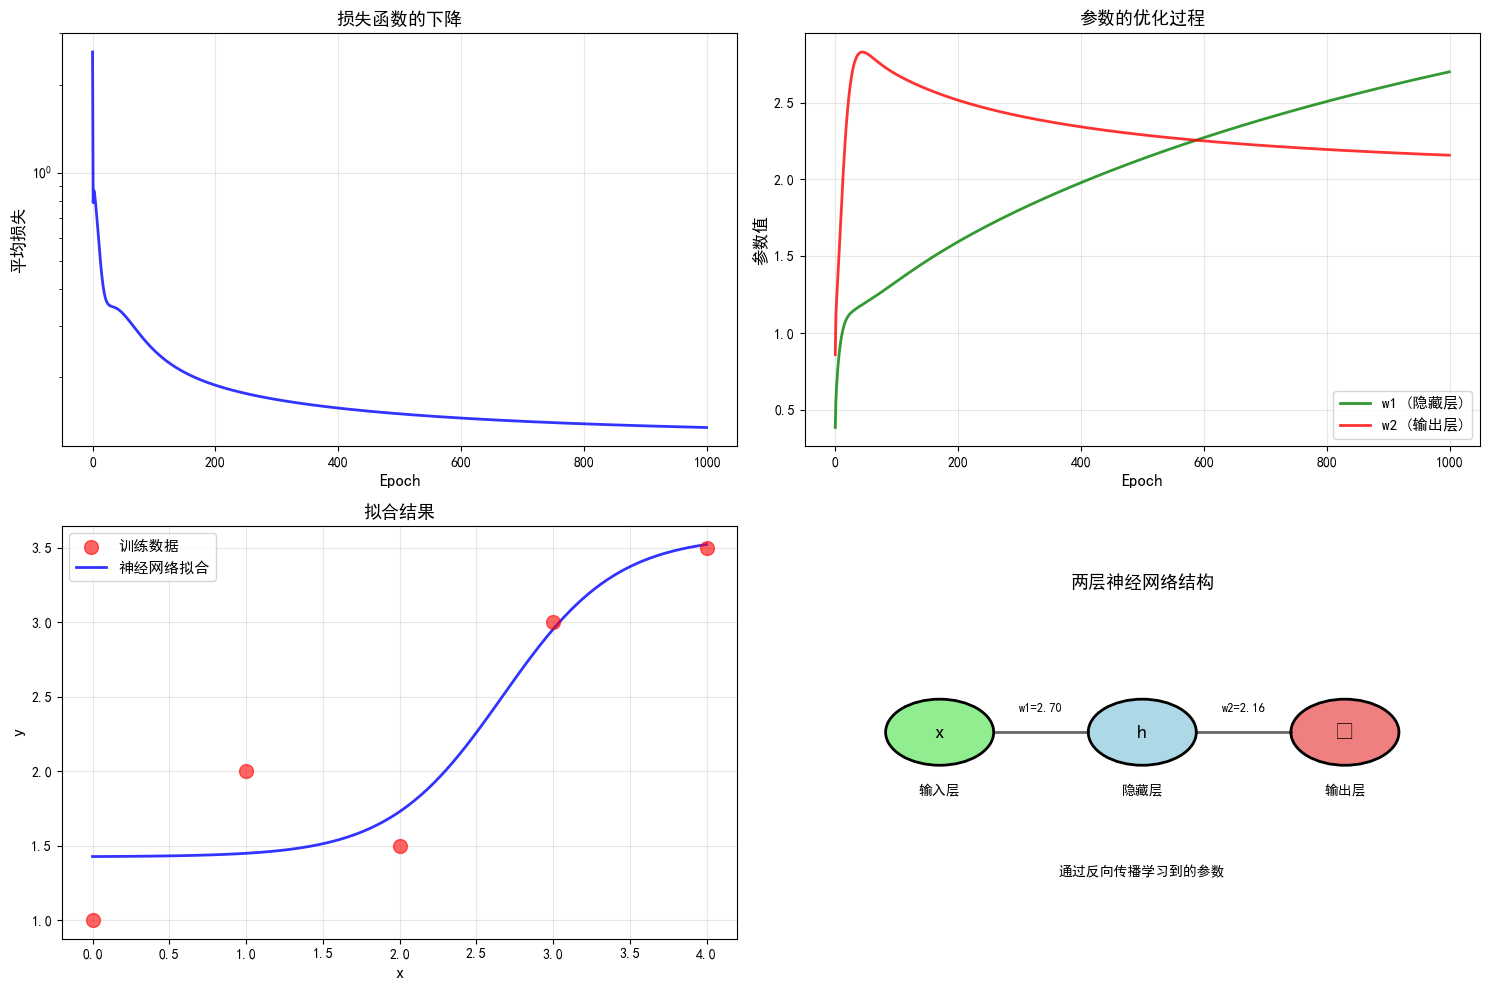

💡 观察：
  - 左上：损失不断下降，说明模型在学习
  - 右上：参数在优化过程中不断调整
  - 左下：神经网络成功拟合了数据
  - 右下：最终学习到的网络结构和参数


In [7]:
# 可视化训练过程
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 损失下降
axes[0, 0].plot(losses_history, 'b-', linewidth=2, alpha=0.8)
axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('平均损失', fontsize=12)
axes[0, 0].set_title('损失函数的下降', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')  # 对数刻度，更清晰

# 2. 参数变化
axes[0, 1].plot(w1_history, 'g-', linewidth=2, label='w1 (隐藏层)', alpha=0.8)
axes[0, 1].plot(w2_history, 'r-', linewidth=2, label='w2 (输出层)', alpha=0.8)
axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('参数值', fontsize=12)
axes[0, 1].set_title('参数的优化过程', fontsize=13, fontweight='bold')
axes[0, 1].legend(fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# 3. 拟合效果
x_test = np.linspace(0, 4, 100)
y_pred_test = []
for x in x_test:
    y_pred_test.append(network.forward(x))
y_pred_test = np.array(y_pred_test)

axes[1, 0].scatter(X_data, y_data, s=100, c='red', alpha=0.6, 
                   label='训练数据', zorder=3)
axes[1, 0].plot(x_test, y_pred_test, 'b-', linewidth=2, 
                label='神经网络拟合', alpha=0.8)
axes[1, 0].set_xlabel('x', fontsize=12)
axes[1, 0].set_ylabel('y', fontsize=12)
axes[1, 0].set_title('拟合结果', fontsize=13, fontweight='bold')
axes[1, 0].legend(fontsize=11)
axes[1, 0].grid(True, alpha=0.3)

# 4. 网络结构可视化
ax = axes[1, 1]
ax.axis('off')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# 绘制神经网络结构
# 输入层
circle1 = plt.Circle((0.2, 0.5), 0.08, color='lightgreen', ec='black', linewidth=2)
ax.add_patch(circle1)
ax.text(0.2, 0.5, 'x', ha='center', va='center', fontsize=14, fontweight='bold')
ax.text(0.2, 0.35, '输入层', ha='center', fontsize=10)

# 隐藏层
circle2 = plt.Circle((0.5, 0.5), 0.08, color='lightblue', ec='black', linewidth=2)
ax.add_patch(circle2)
ax.text(0.5, 0.5, 'h', ha='center', va='center', fontsize=14, fontweight='bold')
ax.text(0.5, 0.35, '隐藏层', ha='center', fontsize=10)

# 输出层
circle3 = plt.Circle((0.8, 0.5), 0.08, color='lightcoral', ec='black', linewidth=2)
ax.add_patch(circle3)
ax.text(0.8, 0.5, 'ŷ', ha='center', va='center', fontsize=14, fontweight='bold')
ax.text(0.8, 0.35, '输出层', ha='center', fontsize=10)

# 连接
ax.plot([0.28, 0.42], [0.5, 0.5], 'k-', linewidth=2, alpha=0.6)
ax.text(0.35, 0.55, f'w1={network.w1:.2f}', ha='center', fontsize=9)

ax.plot([0.58, 0.72], [0.5, 0.5], 'k-', linewidth=2, alpha=0.6)
ax.text(0.65, 0.55, f'w2={network.w2:.2f}', ha='center', fontsize=9)

ax.text(0.5, 0.85, '两层神经网络结构', ha='center', 
        fontsize=13, fontweight='bold')
ax.text(0.5, 0.15, '通过反向传播学习到的参数', ha='center',
        fontsize=10, style='italic')

plt.tight_layout()
plt.show()

print("💡 观察：")
print("  - 左上：损失不断下降，说明模型在学习")
print("  - 右上：参数在优化过程中不断调整")
print("  - 左下：神经网络成功拟合了数据")
print("  - 右下：最终学习到的网络结构和参数")


## 🎯 反向传播的完整流程

### 📝 算法步骤

```python
for each epoch:
    for each 训练样本 (x, y):
        
        # 1️⃣ 前向传播（Forward Pass）
        #    从输入到输出，计算预测值
        输入 x → 隐藏层 h → 输出 ŷ
        计算损失 L = (y - ŷ)²
        
        # 2️⃣ 反向传播（Backward Pass）
        #    从输出到输入，计算梯度
        计算 dL/d输出层参数  ← 直接求导
        计算 dL/d隐藏层参数  ← 链式法则
        ...
        
        # 3️⃣ 参数更新（Gradient Descent）
        #    使用梯度更新参数
        参数 = 参数 - 学习率 × 梯度
```

### 🔑 关键要点

| 步骤 | 作用 | 方向 |
|------|------|------|
| **前向传播** | 计算输出和损失 | 输入 → 输出 ➡️ |
| **反向传播** | 计算梯度 | 输出 → 输入 ⬅️ |
| **梯度下降** | 更新参数 | 使用梯度 |

---


## 🤔 常见疑问解答

### ❓ Q1：为什么叫"反向"传播？

**答：** 因为梯度的计算方向与前向传播相反

```
前向传播：输入 → 隐藏层 → 输出
反向传播：输入 ← 隐藏层 ← 输出
```

### ❓ Q2：为什么要保存中间值？

**答：** 反向传播需要用到前向传播的中间结果

```python
# 前向传播时保存
self.h = sigmoid(self.z1)

# 反向传播时使用
dL_dh = ...  # 需要知道h的值
```

### ❓ Q3：为什么需要激活函数？

**答：** 引入非线性，让网络能学习复杂模式

```
没有激活函数：
  y = w2*(w1*x + b1) + b2 = (w2*w1)*x + (w2*b1 + b2)
  → 还是线性的！等价于单层网络

有激活函数：
  y = w2*σ(w1*x + b1) + b2
  → 非线性！可以学习复杂模式
```

### ❓ Q4：反向传播和梯度下降的区别？

**答：** 

| 算法 | 作用 | 关系 |
|------|------|------|
| **反向传播** | 计算梯度 | 提供梯度 |
| **梯度下降** | 更新参数 | 使用梯度 |

**比喻：**
- 反向传播 = GPS（告诉你方向）
- 梯度下降 = 司机（根据方向开车）

---


## 📋 总结

### 🎯 核心要点

| 概念 | 含义 | 作用 |
|------|------|------|
| **链式法则** | 复合函数的求导法则 | 反向传播的数学基础 |
| **前向传播** | 输入→输出，计算预测 | 得到预测值和损失 |
| **反向传播** | 输出→输入，计算梯度 | 得到每个参数的梯度 |
| **梯度下降** | 用梯度更新参数 | 让模型不断改进 |

### 🔑 关键公式

```python
# 单层：
dL/dw = dL/dy × dy/dw

# 多层（链式法则）：
dL/dw1 = dL/dy × dy/dh × dh/dz × dz/dw1
```

### 💡 核心理解

**反向传播解决了什么问题？**
```
问题：神经网络有很多层，很多参数，如何高效计算梯度？

暴力方法：
  每个参数都单独计算梯度
  → 需要多次前向传播
  → 太慢了！

反向传播：
  从输出层开始，逐层往回计算
  → 利用链式法则
  → 只需要一次前向 + 一次反向
  → 快！
```

### 🌟 为什么重要？

**没有反向传播，就没有：**
- ❌ 深度学习
- ❌ 图像识别
- ❌ 语音识别  
- ❌ ChatGPT、GPT-4
- ❌ Word2Vec、BERT
- ❌ 您要学的 RAG 系统

**反向传播是让神经网络从"概念"变成"现实"的关键算法！**

---


## 🚀 与您的学习路径

### 📚 知识回顾

```
第1步：最小二乘法 ✅
  → 学会了：线性回归的解析解
  → 局限性：只能处理简单线性问题
  
第2步：梯度下降 ✅
  → 学会了：迭代优化的思想
  → 疑问：如何计算复杂模型的梯度？
  
第3步：反向传播 ✅（您现在在这里）
  → 学会了：高效计算神经网络梯度
  → 意义：让深度学习成为可能
```

### 🎯 下一步

```
第4步：优化器（Optimizers）
  → Adam, RMSprop, Momentum
  → 比基础梯度下降更快、更稳定
  
第5步：实战：训练真实的神经网络
  → 手写数字识别（MNIST）
  → 使用 PyTorch/TensorFlow
  
第6步：词向量训练
  → Word2Vec 的反向传播
  → 为 RAG 系统做准备
```

---

## 🎮 练习题

### 练习1：手动计算梯度
给定：
- x = 2
- y_true = 5
- 网络：y_pred = 3x + 1

计算：dL/dx (提示：用链式法则)

### 练习2：修改激活函数
将代码中的 Sigmoid 改成 ReLU，观察训练效果的变化。

### 练习3：增加层数
尝试实现一个三层神经网络，体会反向传播的威力。

---

**创建时间：** 2025-11-19  
**作者：** AI Assistant  
**版本：** 1.0

## ✅ 希望这个文档帮助您理解了反向传播！

如果还有疑问，欢迎继续提问！😊
